In [1]:
!pip install noise

     ---------------------------------------- 0.0/132.0 kB ? eta -:--:--
     -------------------------------------- 132.0/132.0 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build noise


  error: subprocess-exited-with-error
  
  × Building wheel for noise (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [14 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\noise
      copying perlin.py -> build\lib.win-amd64-cpython-310\noise
      copying shader.py -> build\lib.win-amd64-cpython-310\noise
      copying shader_noise.py -> build\lib.win-amd64-cpython-310\noise
      copying test.py -> build\lib.win-amd64-cpython-310\noise
      copying __init__.py -> build\lib.win-amd64-cpython-310\noise
      running build_ext
      building 'noise._simplex' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a

In [94]:
import perlin_noise
def height_generator(n):
    """returns a nxn array of height values using perlin noise"""
    noise = perlin_noise.PerlinNoise(octaves=7, seed=4)
    return [[noise([i/n, j/n]) for j in range(n)] for i in range(n)]


0.5229369980266863
-0.4514670920934155


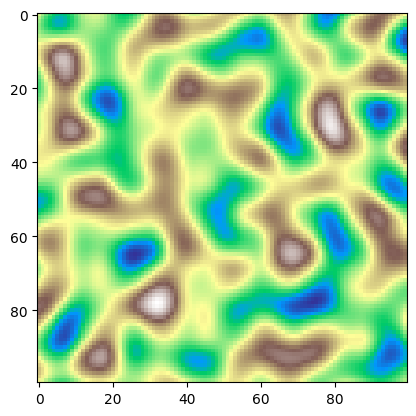

In [95]:
import matplotlib.pyplot as plt
import numpy as np
mapa = height_generator(100)
mapa = np.array(mapa)
print(max(mapa.flatten()))
print(min(mapa.flatten()))
plt.imshow(mapa, cmap='terrain')
plt.show()



In [96]:
# getting the height values of the map, generate the corresponding forests and humidity maps
def get_forests(mapa):
    """returns a nxn array of forest values that go between 0 and 1 depending on the height"""
    forest = np.zeros(mapa.shape)
    lower_bound = -0.2
    upper_bound = 0.3
    for i in range(mapa.shape[0]):
        for j in range(mapa.shape[1]):
            if lower_bound <= mapa[i][j] <= upper_bound:
                forest[i][j] = (mapa[i][j] - lower_bound) / (upper_bound - lower_bound)
    return forest

def get_humidity(mapa):
    """returns a nxn array of humidity values that go between 0 and 1 depending on the height"""
    humidity = np.zeros(mapa.shape)
    lower_bound = -0.5
    upper_bound = 0.3
    for i in range(mapa.shape[0]):
        for j in range(mapa.shape[1]):
            if lower_bound <= mapa[i][j] <= upper_bound:
                # Reverse the calculation so lower heights have higher humidity
                humidity[i][j] = 1 - ((mapa[i][j] - lower_bound) / (upper_bound - lower_bound))
    return humidity

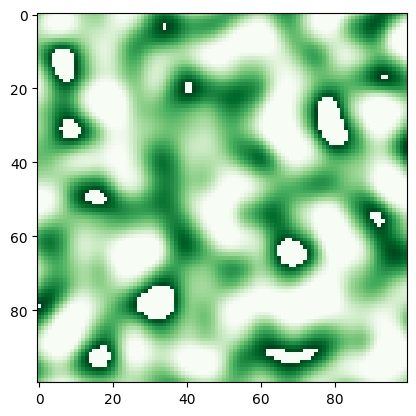

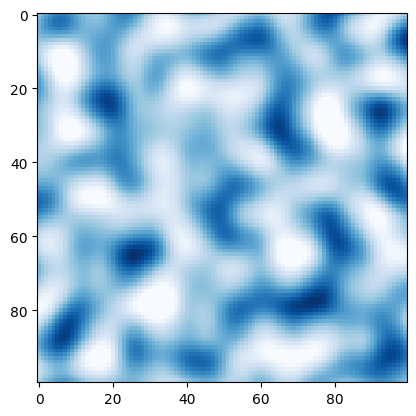

In [97]:
# plot the forest and humidity maps in the same way as the height map
forest = get_forests(mapa)
humidity = get_humidity(mapa)
plt.imshow(forest, cmap='Greens')
plt.show()
plt.imshow(humidity, cmap='Blues')
plt.show()

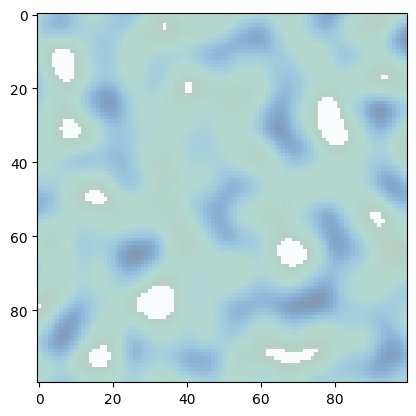

In [98]:
# plot the forest and humidity maps overlapped between each other
plt.imshow(forest, cmap='Greens', alpha=0.5)
plt.imshow(humidity, cmap='Blues', alpha=0.5)
plt.show()

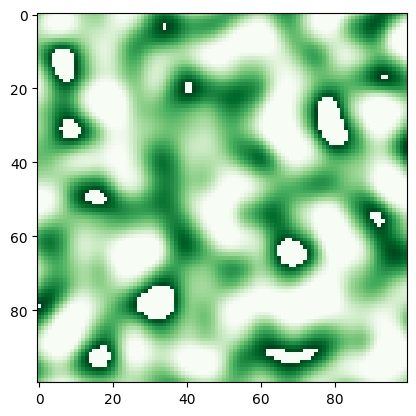

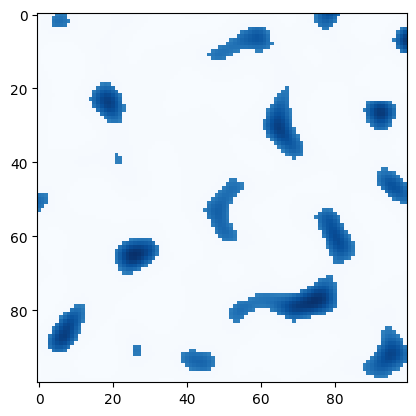

99.99166990919073
0.0
6575.337055817386
0.0


In [99]:
s_forest = forest*100
s_humidity = humidity*100
s_humidity[s_humidity > 65] = s_humidity[s_humidity > 65] * 70
plt.imshow(s_forest, cmap='Greens')   
plt.show()
plt.imshow(s_humidity, cmap='Blues')
plt.show()
print(max(s_forest.flatten()))
print(min(s_forest.flatten()))
print(max(s_humidity.flatten()))
print(min(s_humidity.flatten()))

In [100]:
import pandas as pd
def generate_incendi_data(matrix,name):
    
    dades = {}
    dades["rows"]=len(matrix)
    dades["file title"]=name
    dades["max"] = max(matrix.flatten())*100
    dades["min"] = min(matrix.flatten())*100
    matrix = matrix.flatten()
    matrix = pd.DataFrame(matrix)
    matrix.to_csv(name+".csv", index=False)
    dades["columns"]=1
    df2 = pd.DataFrame(dades, index = ["file title","rows","columns","max","min"])
    df2.to_csv(name+"_dades.csv", index=False)

In [101]:
generate_incendi_data(s_forest,"forest_2")
generate_incendi_data(s_humidity,"humidity_2")